# Super Model (feat. Charlie)

New model starting from the ground up, following ML practices.

### Initialization

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

# Data Loading

In [20]:
# Load datasets for all locations
X_train_observed_A_df = pd.read_csv('A/X_train_observed.csv', parse_dates=['date_forecast'], index_col='date_forecast')
train_targets_A_df = pd.read_csv('A/train_targets.csv', parse_dates=['time'], index_col='time')

X_train_observed_B_df = pd.read_csv('B/X_train_observed_B.csv', parse_dates=['date_forecast'], index_col='date_forecast')
train_targets_B_df = pd.read_csv('B/train_targets_B.csv', parse_dates=['time'], index_col='time')

X_train_observed_C_df = pd.read_csv('C/X_train_observed_C.csv', parse_dates=['date_forecast'], index_col='date_forecast')
train_targets_C_df = pd.read_csv('C/train_targets_C.csv', parse_dates=['time'], index_col='time')



## Resample to hourly frequency

In [21]:
# Resample observed data to hourly frequency
X_train_observed_A_hourly_df = X_train_observed_A_df.resample('H').mean()
X_train_observed_B_hourly_df = X_train_observed_B_df.resample('H').mean()
X_train_observed_C_hourly_df = X_train_observed_C_df.resample('H').mean()

## Combine target values

In [22]:
# Align the target data to the resampled observed data
combined_A_df = X_train_observed_A_hourly_df.join(train_targets_A_df, how='inner')
combined_B_df = X_train_observed_B_hourly_df.join(train_targets_B_df, how='inner')
combined_C_df = X_train_observed_C_hourly_df.join(train_targets_C_df, how='inner')

## Handle missing values

In [23]:
# Handle missing values for location A
combined_A_df['snow_density:kgm3'].fillna(0, inplace=True)
combined_A_df.fillna(combined_A_df.mean(), inplace=True)

# Handle missing values for location A
combined_B_df['snow_density:kgm3'].fillna(0, inplace=True)
combined_B_df.fillna(combined_B_df.mean(), inplace=True)

# Handle missing values for location A
combined_C_df['snow_density:kgm3'].fillna(0, inplace=True)
combined_C_df.fillna(combined_C_df.mean(), inplace=True)

## Confirm alignment after resampling

In [24]:
# Confirm the alignment
aligned_shapes_A = {
    "X_train_observed_A": combined_A_df.drop(columns=['pv_measurement']).shape,
    "train_targets_A": combined_A_df[['pv_measurement']].dropna().shape
}

aligned_shapes_B = {
    "X_train_observed_B": combined_B_df.drop(columns=['pv_measurement']).shape,
    "train_targets_B": combined_B_df[['pv_measurement']].dropna().shape
}

aligned_shapes_C = {
    "X_train_observed_C": combined_C_df.drop(columns=['pv_measurement']).shape,
    "train_targets_C": combined_C_df[['pv_measurement']].dropna().shape
}

# Output the aligned shapes
print(aligned_shapes_A)
print(aligned_shapes_B)
print(aligned_shapes_C)

{'X_train_observed_A': (29667, 45), 'train_targets_A': (29667, 1)}
{'X_train_observed_B': (29222, 45), 'train_targets_B': (29222, 1)}
{'X_train_observed_C': (29200, 45), 'train_targets_C': (29200, 1)}


# EDA

### A

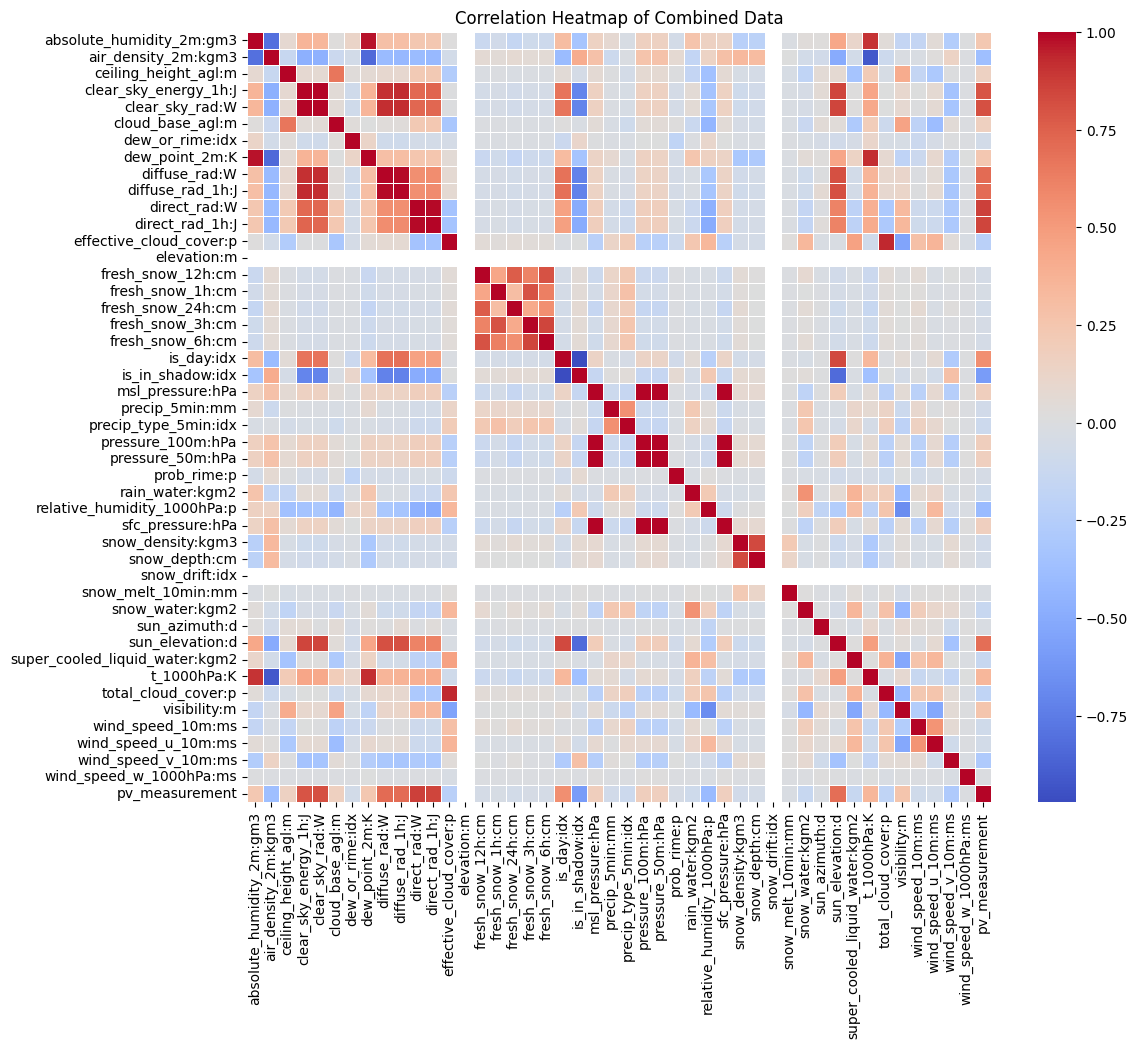

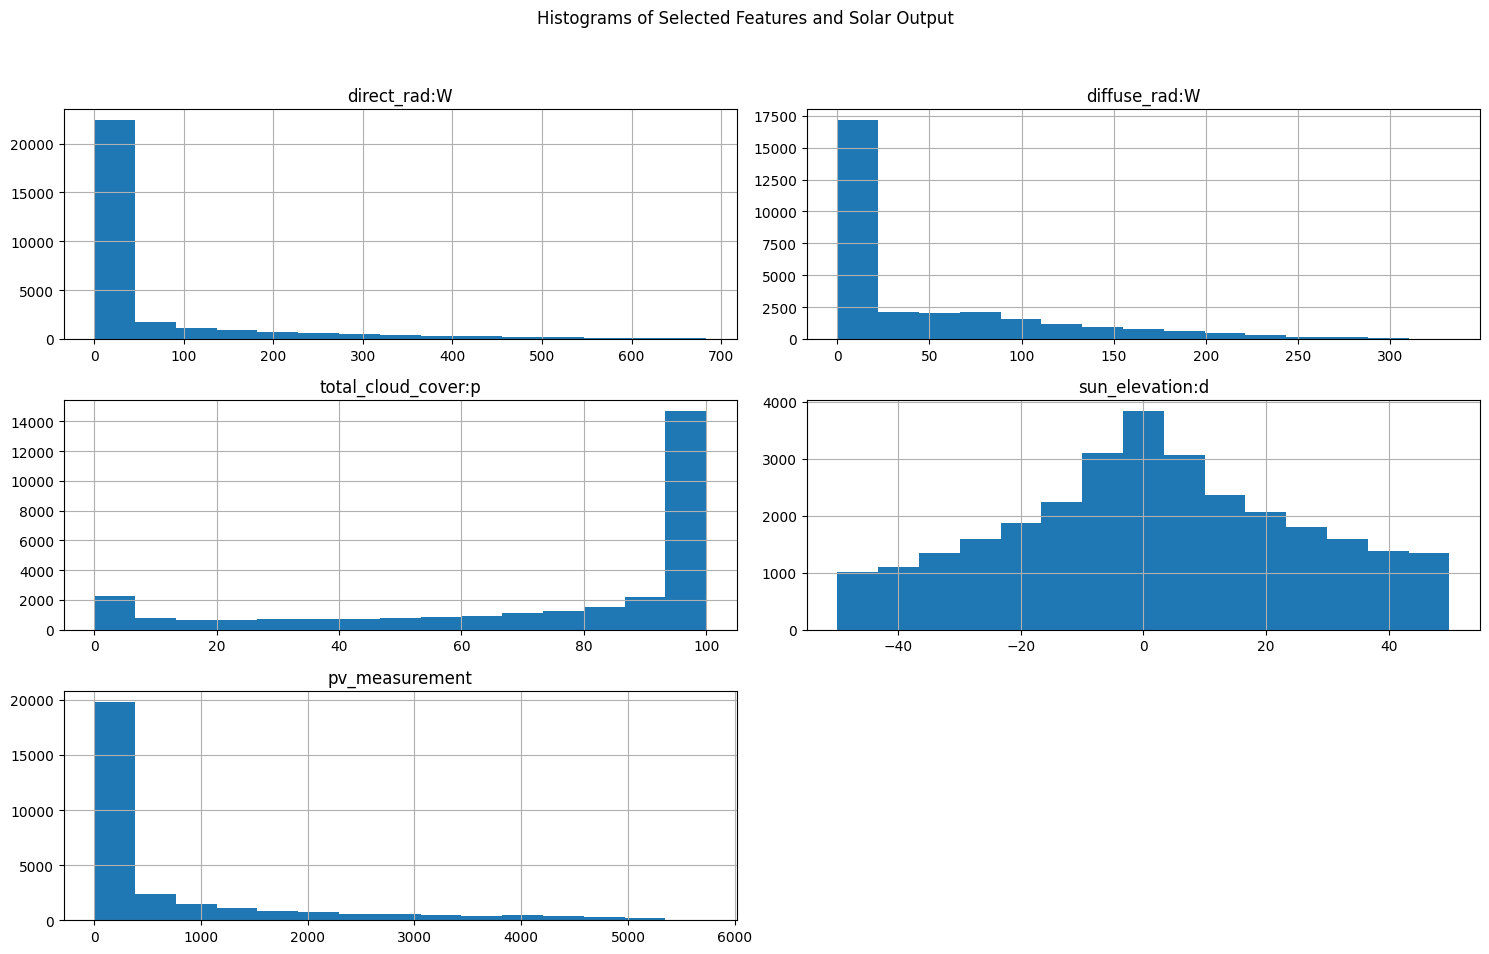

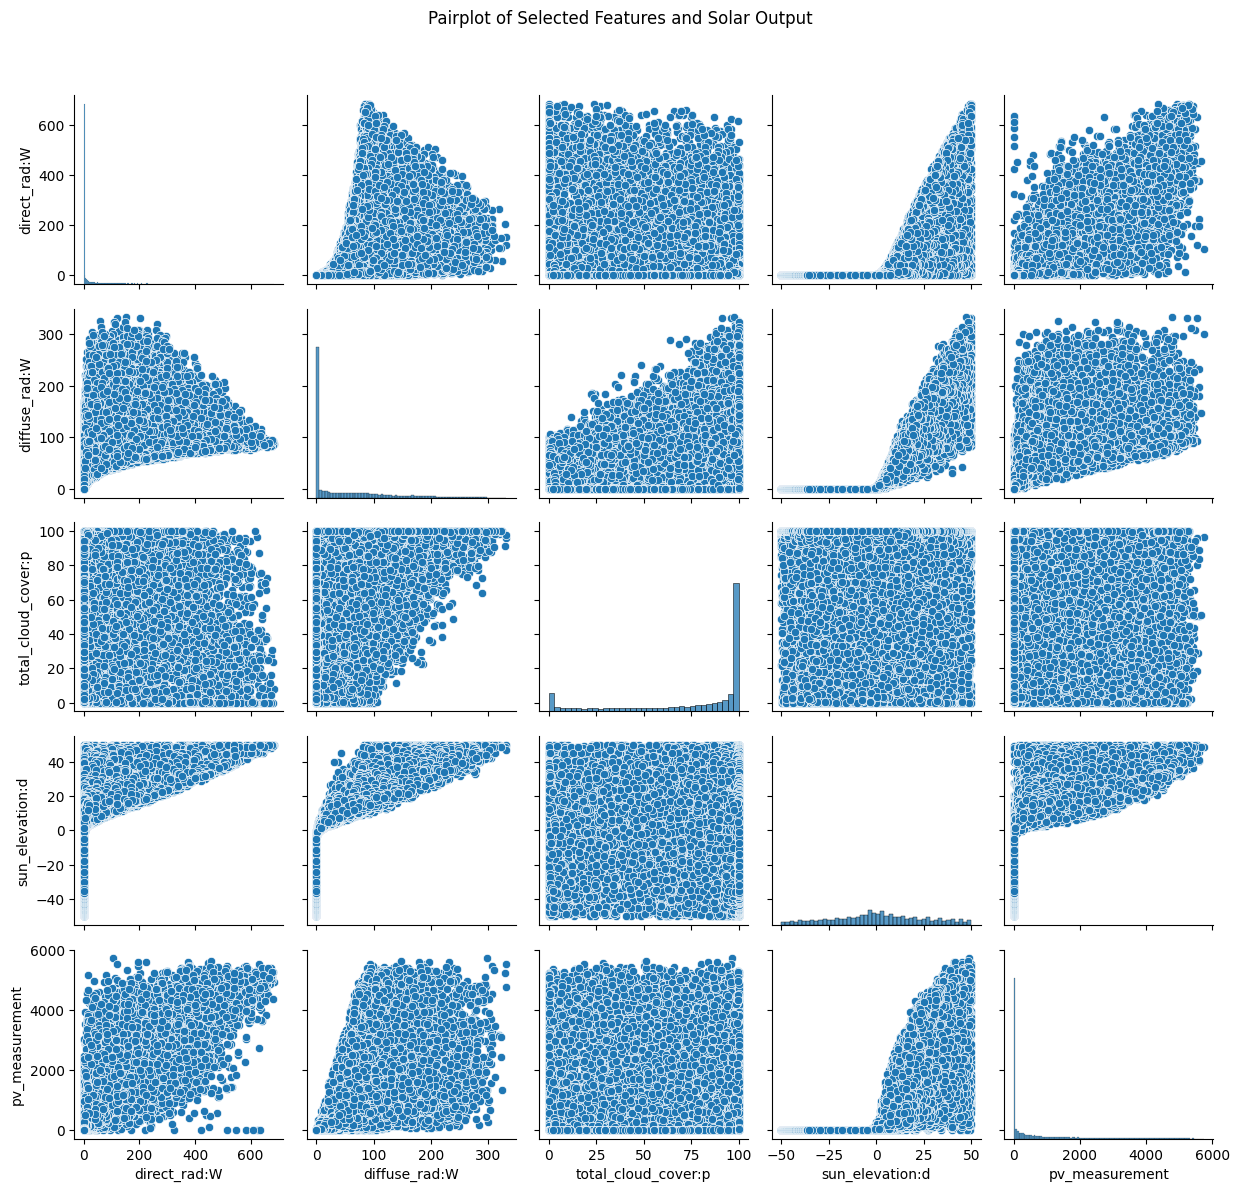

In [25]:
# Calculate the correlations for the combined dataset
correlation_matrix = combined_A_df.corr()

# Plot the correlation heatmap for the new combined dataset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Combined Data')
plt.show()

# Create histograms for some selected features and the target variable
selected_features = ['direct_rad:W', 'diffuse_rad:W', 'total_cloud_cover:p', 'sun_elevation:d', 'pv_measurement']
combined_A_df[selected_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Selected Features and Solar Output')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()

# Let's also look at a pair plot for the selected features and the target variable to visualize pairwise relationships
sns.pairplot(combined_A_df[selected_features])
plt.suptitle('Pairplot of Selected Features and Solar Output')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()


### B

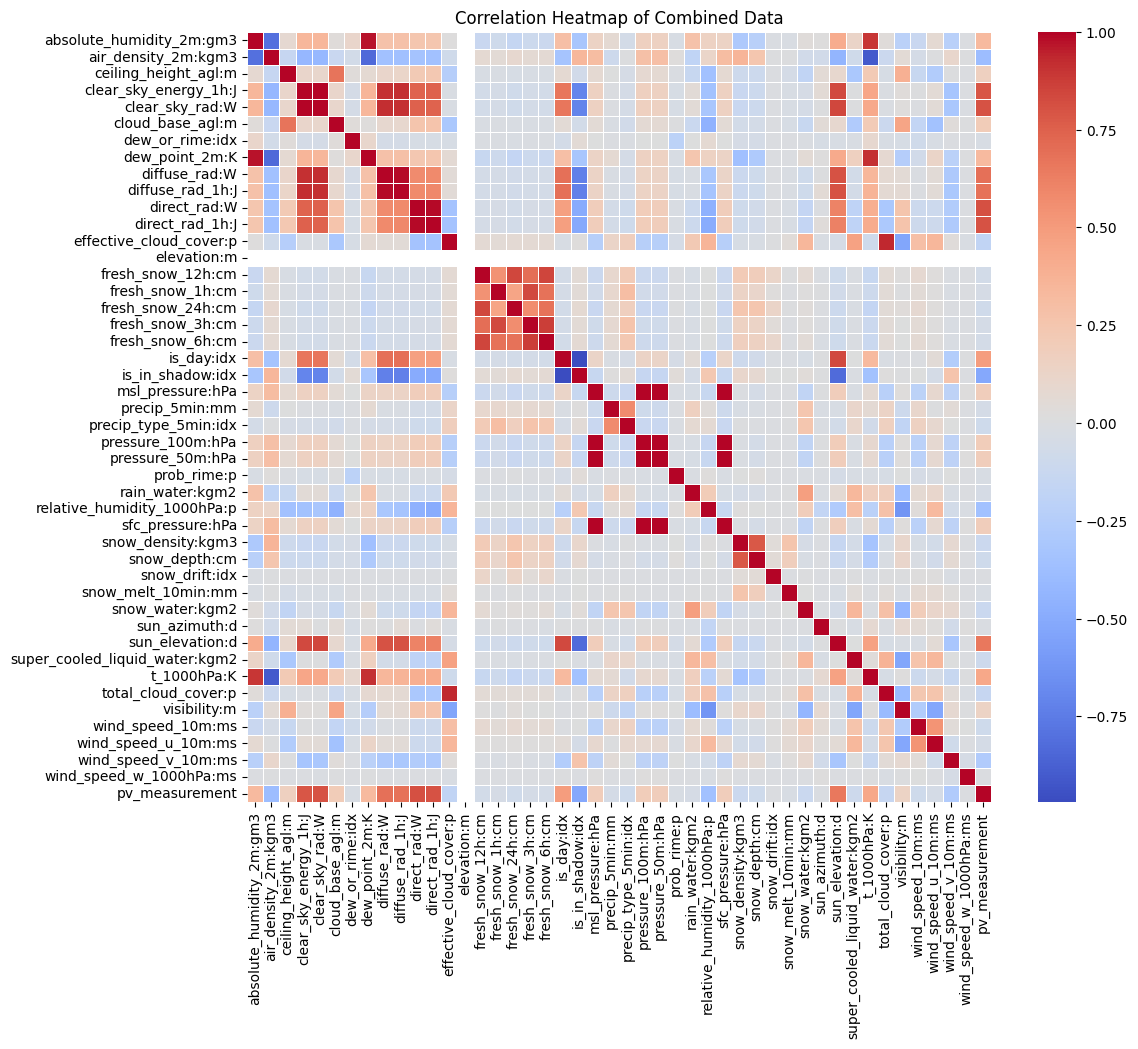

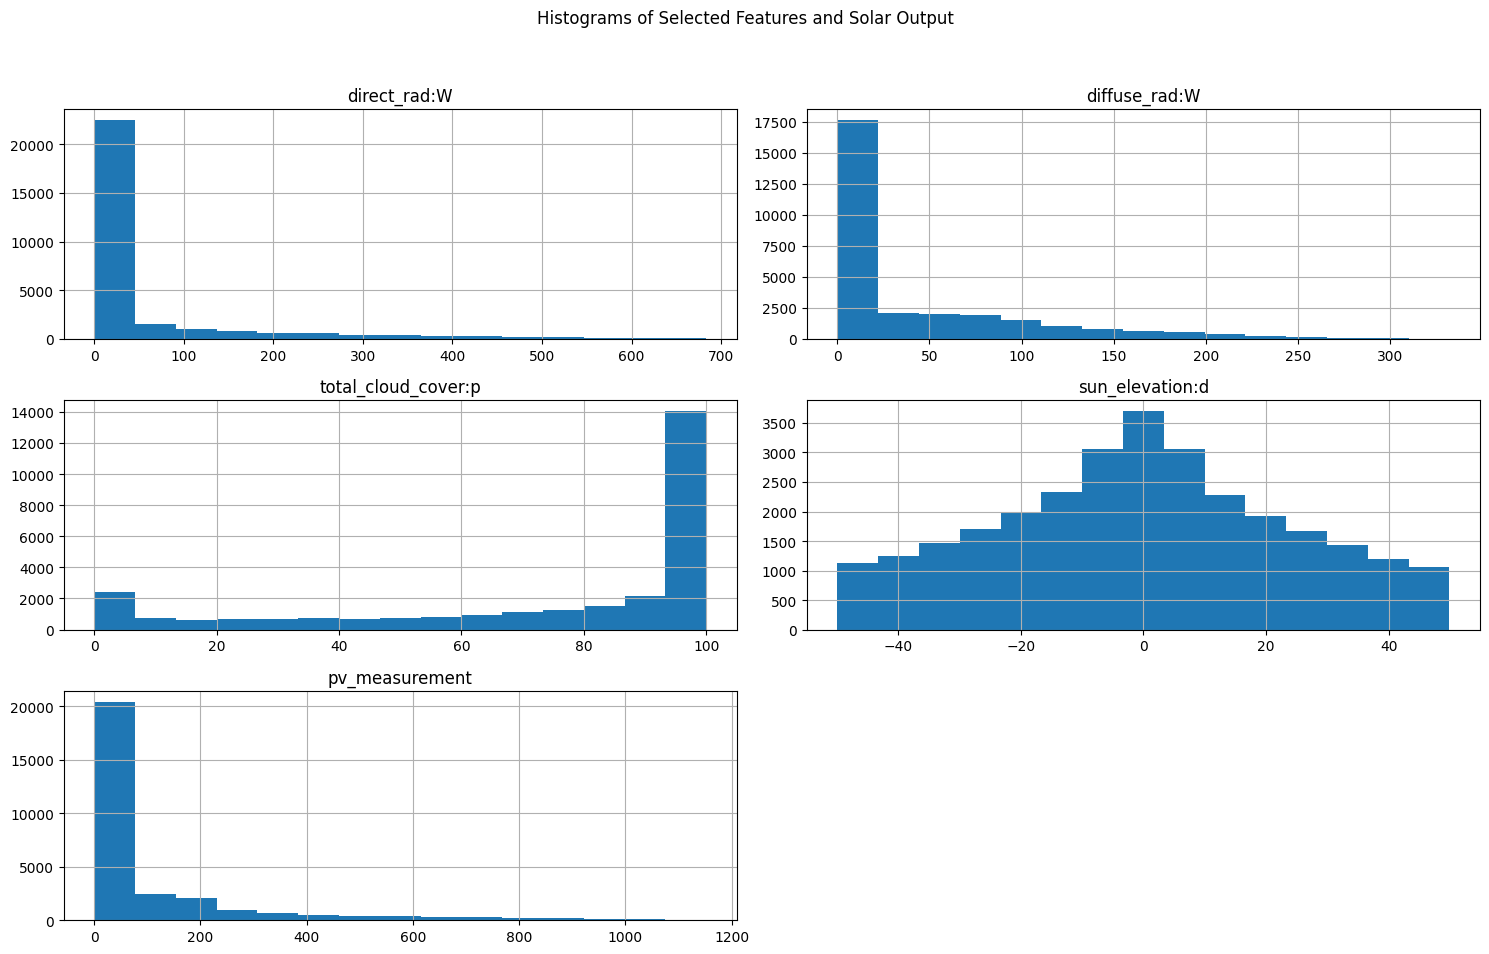

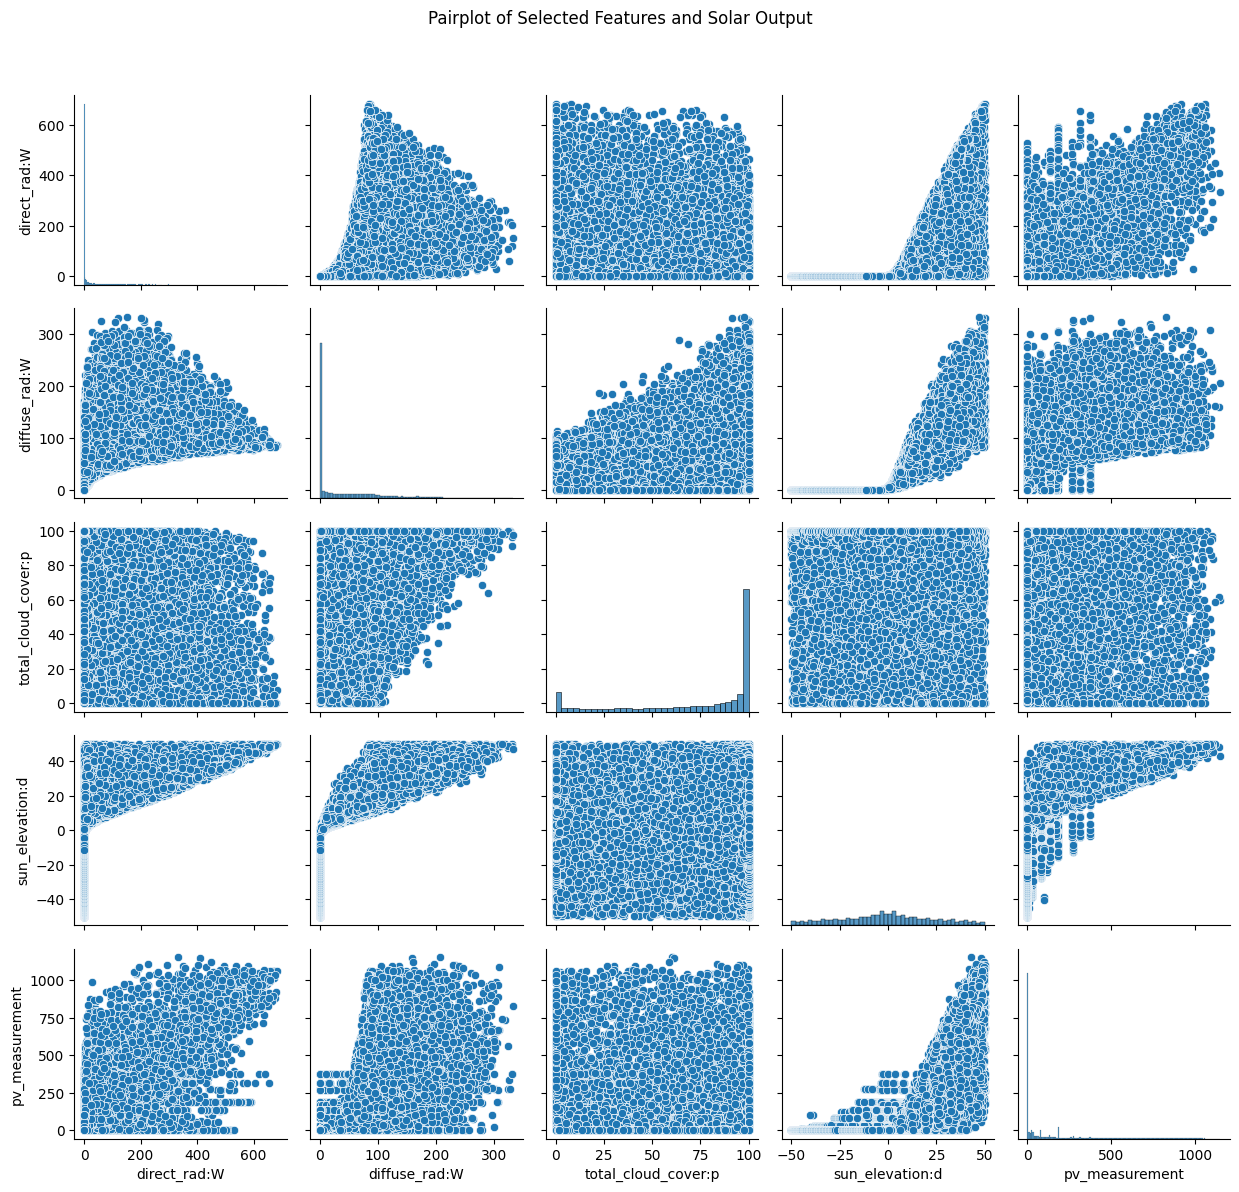

In [26]:
# Calculate the correlations for the combined dataset
correlation_matrix = combined_B_df.corr()

# Plot the correlation heatmap for the new combined dataset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Combined Data')
plt.show()

# Create histograms for some selected features and the target variable
selected_features = ['direct_rad:W', 'diffuse_rad:W', 'total_cloud_cover:p', 'sun_elevation:d', 'pv_measurement']
combined_B_df[selected_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Selected Features and Solar Output')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()

# Let's also look at a pair plot for the selected features and the target variable to visualize pairwise relationships
sns.pairplot(combined_B_df[selected_features])
plt.suptitle('Pairplot of Selected Features and Solar Output')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()


### C

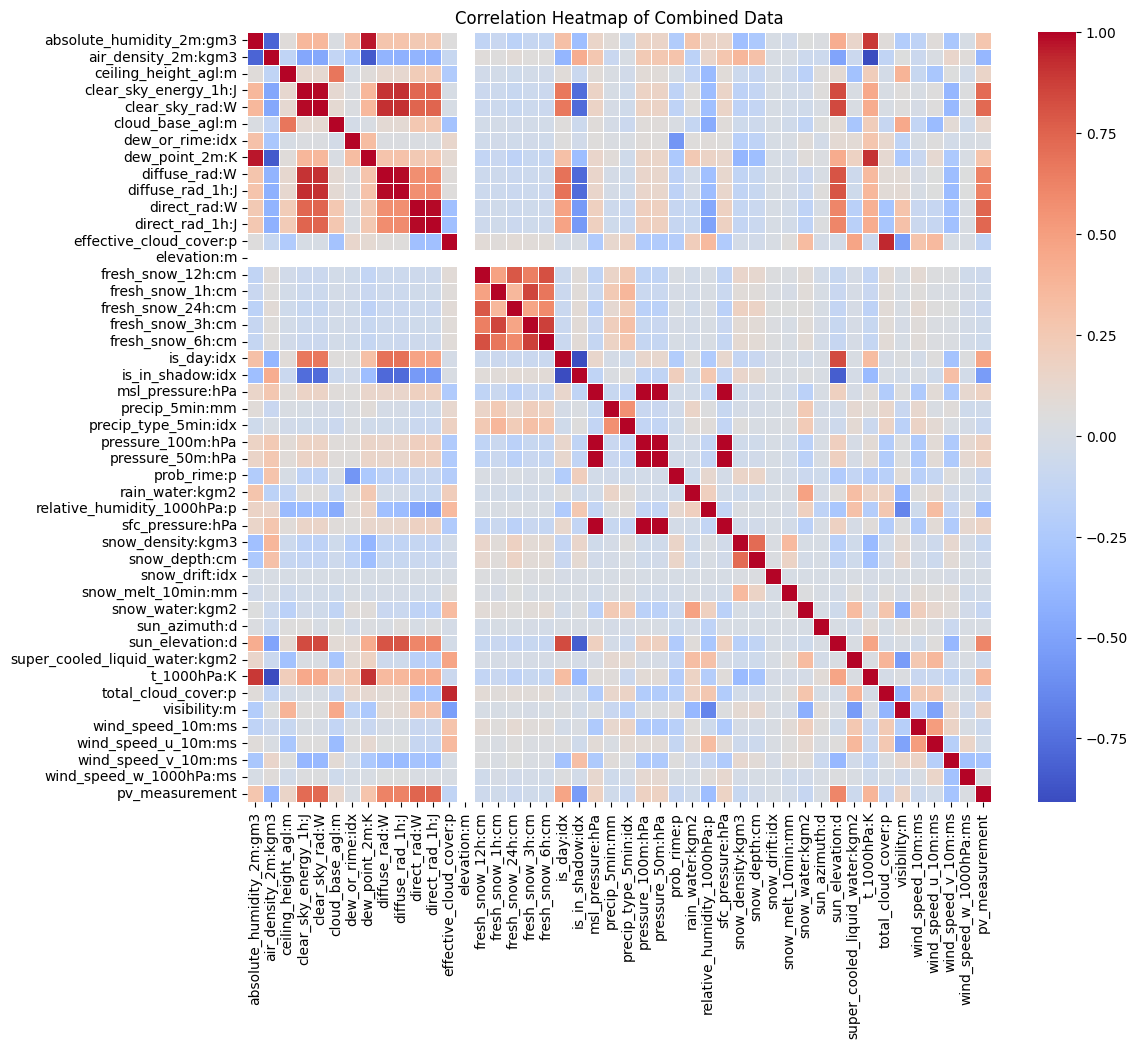

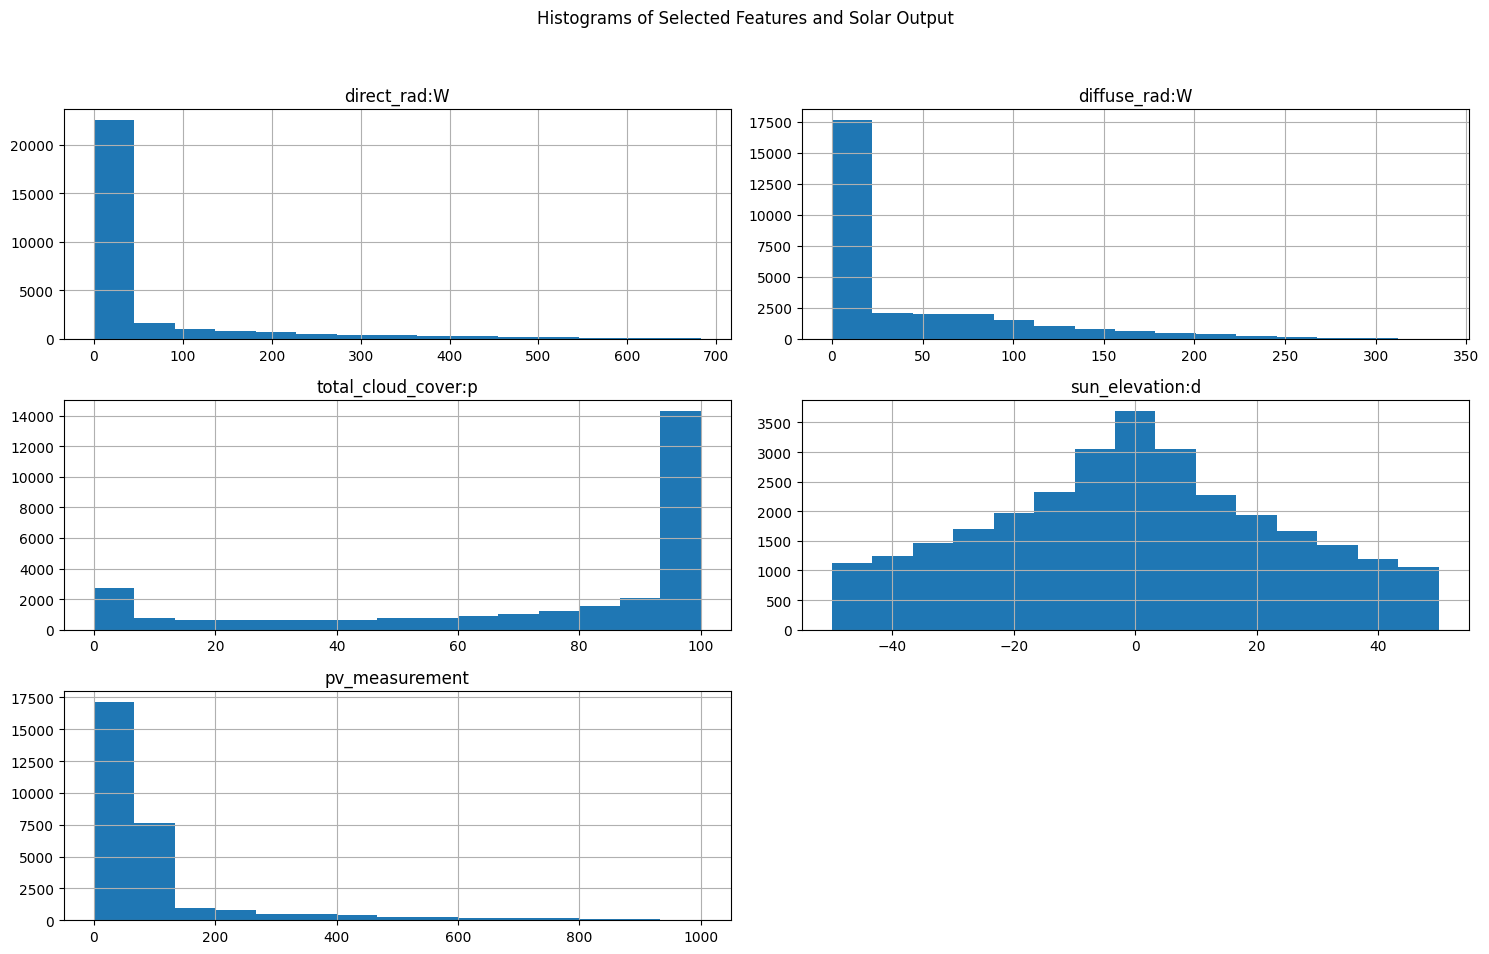

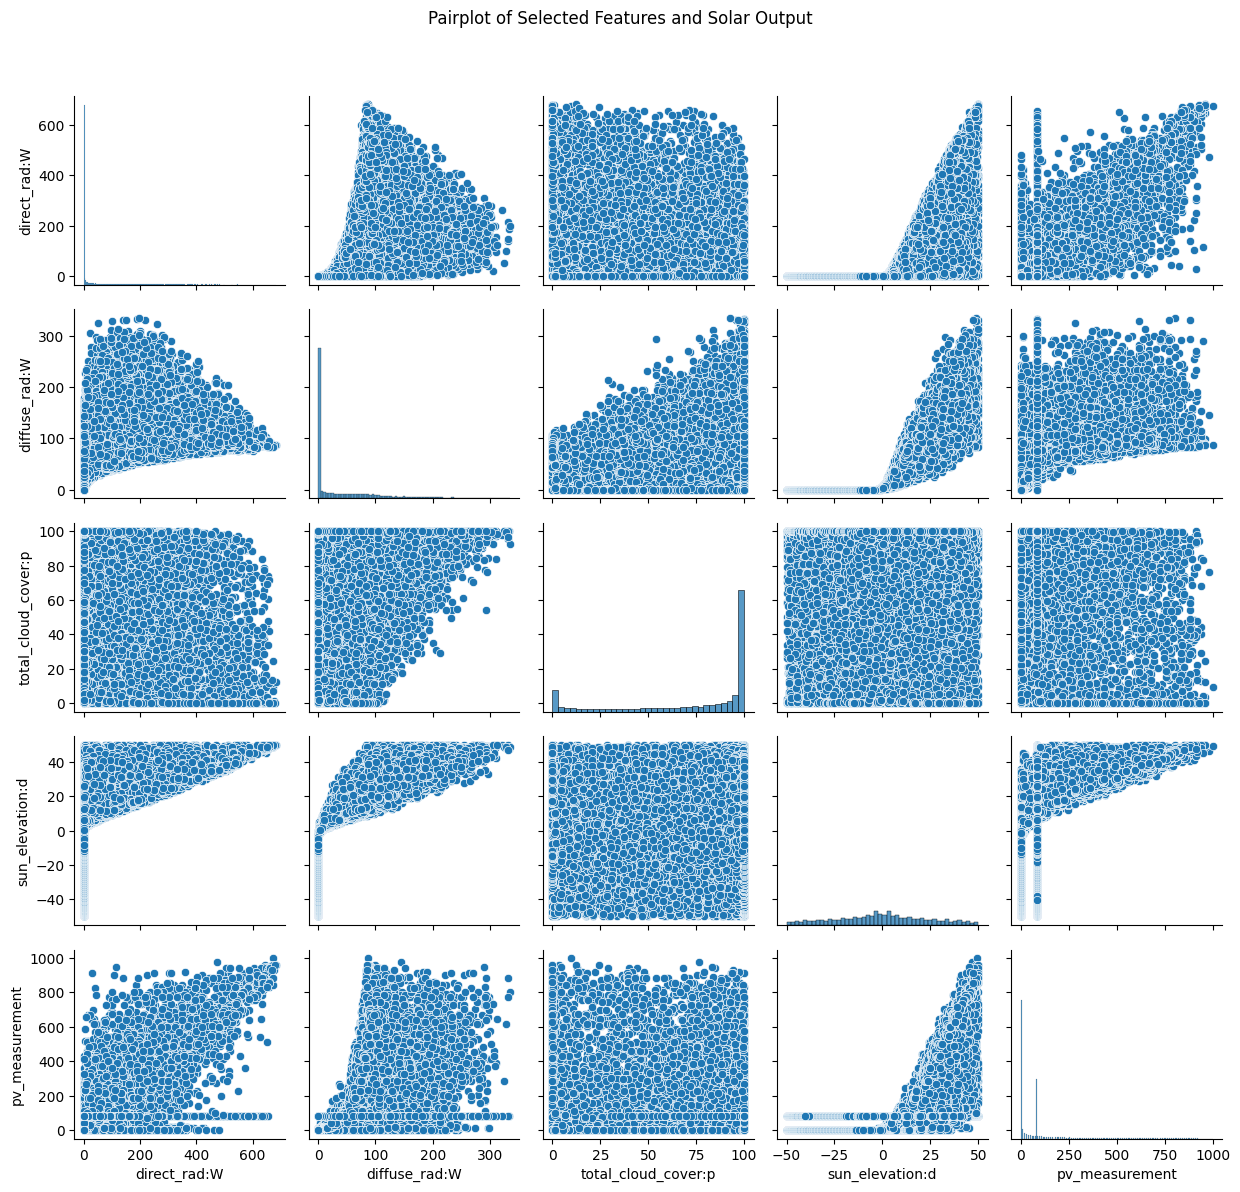

In [27]:
# Calculate the correlations for the combined dataset
correlation_matrix = combined_C_df.corr()

# Plot the correlation heatmap for the new combined dataset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Combined Data')
plt.show()

# Create histograms for some selected features and the target variable
selected_features = ['direct_rad:W', 'diffuse_rad:W', 'total_cloud_cover:p', 'sun_elevation:d', 'pv_measurement']
combined_C_df[selected_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Selected Features and Solar Output')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()

# Let's also look at a pair plot for the selected features and the target variable to visualize pairwise relationships
sns.pairplot(combined_C_df[selected_features])
plt.suptitle('Pairplot of Selected Features and Solar Output')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()


# Correlation Analysis
Top 10 correlated features with target variable

In [28]:
# Calculate the correlation matrix for the combined dataset of location A
correlation_matrix_A = combined_A_df.corr()
correlation_matrix_B = combined_B_df.corr()
correlation_matrix_C = combined_C_df.corr()

# Extract the correlations of features with the solar output for location A
feature_correlation_with_target_A = correlation_matrix_A['pv_measurement'].sort_values(ascending=False)
feature_correlation_with_target_B = correlation_matrix_B['pv_measurement'].sort_values(ascending=False)
feature_correlation_with_target_C = correlation_matrix_C['pv_measurement'].sort_values(ascending=False)

# Output the top correlated features for location A
top_correlated_features_A = feature_correlation_with_target_A.head(10)
top_correlated_features_B = feature_correlation_with_target_B.head(10)
top_correlated_features_C = feature_correlation_with_target_C.head(10)

top_correlated_features_A, top_correlated_features_B, top_correlated_features_C

(pv_measurement           1.000000
 direct_rad:W             0.864334
 direct_rad_1h:J          0.850497
 clear_sky_rad:W          0.812047
 clear_sky_energy_1h:J    0.799407
 diffuse_rad:W            0.711396
 diffuse_rad_1h:J         0.703887
 sun_elevation:d          0.695713
 is_day:idx               0.554569
 t_1000hPa:K              0.351691
 Name: pv_measurement, dtype: float64,
 pv_measurement           1.000000
 direct_rad:W             0.813472
 direct_rad_1h:J          0.802817
 clear_sky_rad:W          0.800800
 clear_sky_energy_1h:J    0.790263
 diffuse_rad:W            0.688844
 diffuse_rad_1h:J         0.684326
 sun_elevation:d          0.660414
 is_day:idx               0.489087
 t_1000hPa:K              0.433769
 Name: pv_measurement, dtype: float64,
 pv_measurement           1.000000
 direct_rad:W             0.740432
 direct_rad_1h:J          0.738604
 clear_sky_rad:W          0.728901
 clear_sky_energy_1h:J    0.724331
 diffuse_rad:W            0.623510
 diffuse_rad

10 Lowest correlated features with target variable

In [29]:
# Output the top correlated features for location A
low_correlated_features_A = feature_correlation_with_target_A.tail(10)
low_correlated_features_B = feature_correlation_with_target_B.tail(10)
low_correlated_features_C = feature_correlation_with_target_C.tail(10)

low_correlated_features_A, low_correlated_features_B, low_correlated_features_C

(super_cooled_liquid_water:kgm2   -0.131534
 snow_water:kgm2                  -0.138618
 total_cloud_cover:p              -0.184978
 effective_cloud_cover:p          -0.217712
 wind_speed_v_10m:ms              -0.279632
 air_density_2m:kgm3              -0.376162
 relative_humidity_1000hPa:p      -0.405435
 is_in_shadow:idx                 -0.586869
 elevation:m                            NaN
 snow_drift:idx                         NaN
 Name: pv_measurement, dtype: float64,
 super_cooled_liquid_water:kgm2   -0.096350
 snow_density:kgm3                -0.113997
 snow_water:kgm2                  -0.115522
 total_cloud_cover:p              -0.142852
 effective_cloud_cover:p          -0.174269
 wind_speed_v_10m:ms              -0.273067
 relative_humidity_1000hPa:p      -0.360881
 air_density_2m:kgm3              -0.386191
 is_in_shadow:idx                 -0.521125
 elevation:m                            NaN
 Name: pv_measurement, dtype: float64,
 snow_density:kgm3             -0.095998
 

# Feature selection

In [30]:
# Define the features to keep based on the highest correlations provided earlier
features_to_keep = [
    'direct_rad:W', 'direct_rad_1h:J', 'clear_sky_rad:W', 
    'clear_sky_energy_1h:J', 'diffuse_rad:W', 'diffuse_rad_1h:J', 
    'sun_elevation:d', 'is_day:idx', 't_1000hPa:K'
]

# Define the features to drop based on the lowest correlations provided earlier
# features_to_drop = [
#     'super_cooled_liquid_water:kgm2', 'snow_water:kgm2', 'total_cloud_cover:p',
#     'effective_cloud_cover:p', 'wind_speed_v_10m:ms', 'air_density_2m:kgm3',
#     'relative_humidity_1000hPa:p', 'is_in_shadow:idx', 'elevation:m', 
#     'snow_drift:idx', 'snow_density:kgm3', 'prob_rime:p'
# ]

# Prepare the datasets for each location
# We create copies of the dataframes to avoid modifying the original dataframes
X_train_A_selected = combined_A_df[features_to_keep].copy()
X_train_B_selected = combined_B_df[features_to_keep].copy()
X_train_C_selected = combined_C_df[features_to_keep].copy()

# Drop the features with the lowest correlations
# X_train_A_selected.drop(columns=features_to_drop, errors='ignore', inplace=True)
# X_train_B_selected.drop(columns=features_to_drop, errors='ignore', inplace=True)
# X_train_C_selected.drop(columns=features_to_drop, errors='ignore', inplace=True)

# Output the shapes of the prepared datasets to ensure the process was successful
prepared_shapes = {
    "X_train_A_selected": X_train_A_selected.shape,
    "X_train_B_selected": X_train_B_selected.shape,
    "X_train_C_selected": X_train_C_selected.shape
}

prepared_shapes

{'X_train_A_selected': (29667, 9),
 'X_train_B_selected': (29222, 9),
 'X_train_C_selected': (29200, 9)}

# Model Setup

### Random Forest Regressor

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'X_train_A_selected' is your feature set and 'train_targets_A' is your target set for location A
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_A_selected, combined_A_df[['pv_measurement']], test_size=0.2, random_state=42)

# Initialize the model - Random Forest Regressor in this case
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 216133.6944851277
RMSE: 464.9018116604061
MAE: 215.09228178294572
